In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/Advertising.csv


# 1.Basic Information about dataset

In [2]:
df=pd.read_csv('/kaggle/input/advertising-dataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 2.Checking Missing Values

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 3.EDA

## 3.1 Plot Sales curve for different features

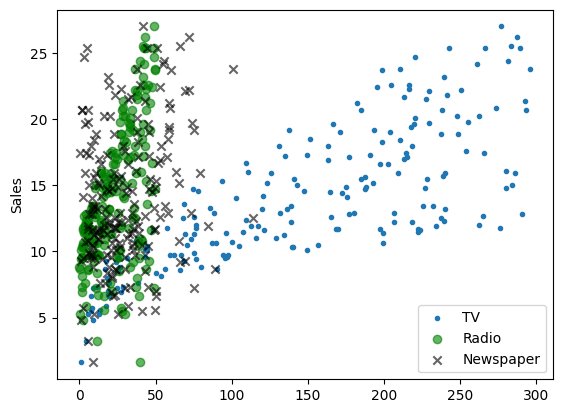

In [5]:
plt.scatter(x='TV', y='Sales', marker='.', data=df, label='TV')
plt.scatter(x='Radio', y='Sales', data=df, marker='o', color='green', alpha=0.6, label='Radio')
plt.scatter(x='Newspaper', y='Sales', data=df, marker='x', color='black', alpha=0.6, label='Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 3.2 Correlation Heatmap

<Axes: >

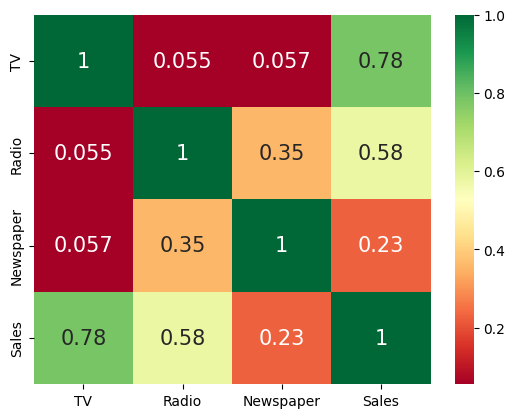

In [6]:
corr_data=df.corr()
sns.heatmap(corr_data, cmap='RdYlGn', annot=True, annot_kws={'fontsize':15})

# 4.Preparing Data for Modeling

## 4.1 Forming Input and Output Datasets

In [7]:
x=pd.DataFrame(data=df, columns=['TV', 'Radio', 'Newspaper'])
y=df['Sales']

## 4.2 Splitting training and test data

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# 5.Builing the Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

# 6.Model Evaluation

## 6.1 Checking R squared score

In [10]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test, y_pred)
rse=mean_squared_error(y_test,y_pred, squared=False)
r2,rse

(0.8783317553341622, 1.6403330364162259)

## 6.2 Feature coeffecients

In [11]:
c_df=pd.DataFrame(index=x.columns, columns=['coeff'])
c_df['coeff']=model.coef_
c_df

,coeff
TV,0.046017
Radio,0.191964
Newspaper,-0.004434


## 6.3 Plot of Actual vs Predicted Output

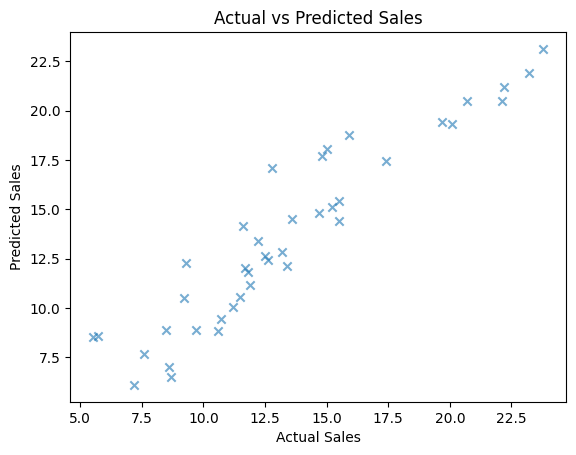

In [12]:
plt.scatter(y=y_pred, x=y_test,marker='x', alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.show()

## 6.3 Residual Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Count'>

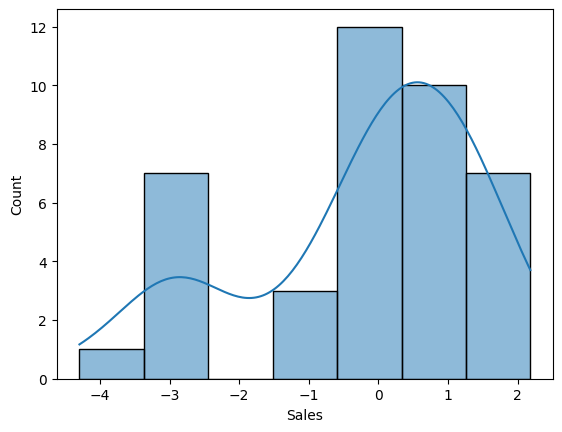

In [13]:
residuals=y_test-y_pred
sns.histplot(residuals, kde=True)

# 7. Conclusion
## 🔹 Key Insights

TV and Radio spend have strong positive impact on Sales.

Newspaper has very little effect (coefficient close to 0).

The model achieves high R², meaning it explains most of the variance in Sales.

## 🔹 Model Performance

The regression model fits the data well.

Predictions are reasonably close to actual sales values.

Residuals are roughly normally distributed → good model assumptions.

## 🔹 Final Note

This model is suitable for estimating the effect of advertising budgets on sales.